# Rs 6 0 2_ H L Factory Combinationexample
High Level Factory: creation of a combined model




**Author:** Danilo Piparo  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 03:23 AM.</small></i>

In [1]:
%%cpp -d
#include <fstream>
#include "TString.h"
#include "TROOT.h"
#include "RooGlobalFunc.h"
#include "RooWorkspace.h"
#include "RooRealVar.h"
#include "RooAbsPdf.h"
#include "RooDataSet.h"
#include "RooPlot.h"
#include "RooStats/HLFactory.h"

Use this order for safety on library loading

In [2]:
%%cpp -d
// This is a workaround to make sure the namespace is used inside functions
using namespace RooFit;
using namespace RooStats;

In [3]:
using namespace std;

In [4]:
using namespace RooStats;
using namespace RooFit;

Create a card

In [5]:
TString card_name("HLFavtoryCombinationexample.rs");
ofstream ofile(card_name);
ofile << "// The simplest card for combination\n\n"
      << "gauss1 = Gaussian(x[0,100],mean1[50,0,100],4);\n"
      << "flat1 = Polynomial(x,0);\n"
      << "sb_model1 = SUM(nsig1[120,0,300]*gauss1 , nbkg1[100,0,1000]*flat1);\n"
      << "gauss2 = Gaussian(x,mean2[80,0,100],5);\n"
      << "flat2 = Polynomial(x,0);\n"
      << "sb_model2 = SUM(nsig2[90,0,400]*gauss2 , nbkg2[80,0,1000]*flat2);\n";

ofile.close();

HLFactory hlf("HLFavtoryCombinationexample", card_name, false);

hlf.AddChannel("model1", "sb_model1", "flat1");
hlf.AddChannel("model2", "sb_model2", "flat2");
auto pdf = hlf.GetTotSigBkgPdf();
auto thecat = hlf.GetTotCategory();
auto x = static_cast<RooRealVar *>(hlf.GetWs()->arg("x"));

auto data = pdf->generate(RooArgSet(*x, *thecat), Extended());


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt

[#1] INFO:ObjectHandling -- RooWorkspace::exportToCint(HLFavtoryCombinationexample_ws) INFO: references to all objects in this workspace will be created in CINT in 'namespace HLFavtoryCombinationexample_ws'


--- perform extended ml fit of composite pdf to toy data ---

In [6]:
pdf->fitTo(*data);

[#1] INFO:Minization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
RooAbsTestStatistic::initSimMode: creating slave calculator #0 for state model1 (211 dataset entries)
RooAbsTestStatistic::initSimMode: creating slave calculator #1 for state model2 (175 dataset entries)
[#1] INFO:Fitting -- RooAbsTestStatistic::initSimMode: created 2 slave calculators.
[#1] INFO:Minization --  The following expressions have been identified as constant and will be precalculated and cached: (flat1)
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (gauss1)
[#1] INFO:Minization --  The following expressions have been identified as constant and will be precalculated and cached: (flat2)
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (gauss2)
 **********
 **    1 **SET PRINT           1
 **********


--- plot toy data and composite pdf overlaid ---

In [7]:
auto xframe = x->frame();

data->plotOn(xframe);
thecat->setIndex(0);
pdf->plotOn(xframe, Slice(*thecat), ProjWData(*thecat, *data));

thecat->setIndex(1);
pdf->plotOn(xframe, Slice(*thecat), ProjWData(*thecat, *data));

gROOT->SetStyle("Plain");
xframe->Draw();

[#1] INFO:Plotting -- RooSimultaneous::plotOn(HLFavtoryCombinationexample_sigbkg) plot on x represents a slice in the index category (HLFavtoryCombinationexample_category)
[#1] INFO:Plotting -- RooAbsReal::plotOn(sb_model1) slice variable HLFavtoryCombinationexample_category was not projected anyway
[#1] INFO:Plotting -- RooSimultaneous::plotOn(HLFavtoryCombinationexample_sigbkg) plot on x represents a slice in the index category (HLFavtoryCombinationexample_category)
[#1] INFO:Plotting -- RooAbsReal::plotOn(sb_model2) slice variable HLFavtoryCombinationexample_category was not projected anyway


Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


Draw all canvases 

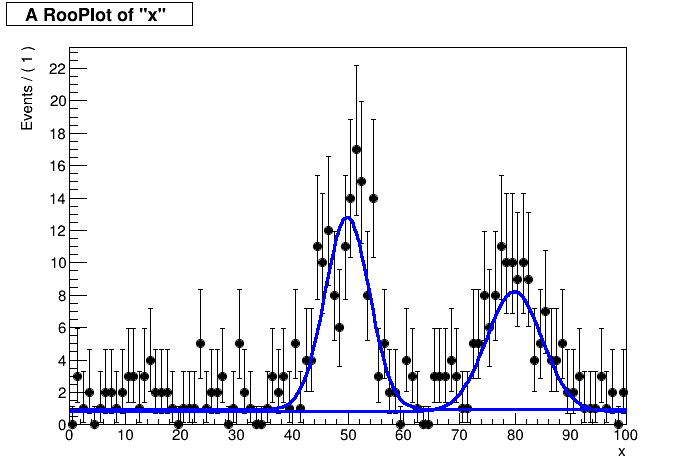

In [8]:
gROOT->GetListOfCanvases()->Draw()